In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# DATA AND DATA ANALYSIS

In [25]:
# Load the datasets (adjust the path to where you download the files)
print("Loading MovieLens 100k data...")
# Download from: https://files.grouplens.org/datasets/movielens/ml-100k.zip
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./data/ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1')


Loading MovieLens 100k data...


In [26]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [27]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('./data/ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')

In [28]:
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [29]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url', 
          'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
          'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('./data/ml-100k/u.item', sep='|', names=m_cols, encoding='latin-1')

In [30]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# Merge the data into one comprehensive DataFrame
print("Merging data...")
df = ratings.merge(users, on='user_id').merge(movies, on='movie_id')

# Basic Dataset Info
print("\n=== DATASET SHAPE ===")
print(f"Ratings DataFrame Shape: {df.shape}")
print(f"Unique Users: {df['user_id'].nunique()}")
print(f"Unique Movies: {df['movie_id'].nunique()}")

Merging data...

=== DATASET SHAPE ===
Ratings DataFrame Shape: (100000, 31)
Unique Users: 943
Unique Movies: 1682


In [32]:
# Basic Statistics
print("\n=== BASIC STATISTICS ===")
print(df['rating'].describe())


=== BASIC STATISTICS ===
count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


Plot saved as 'rating_distribution.png'


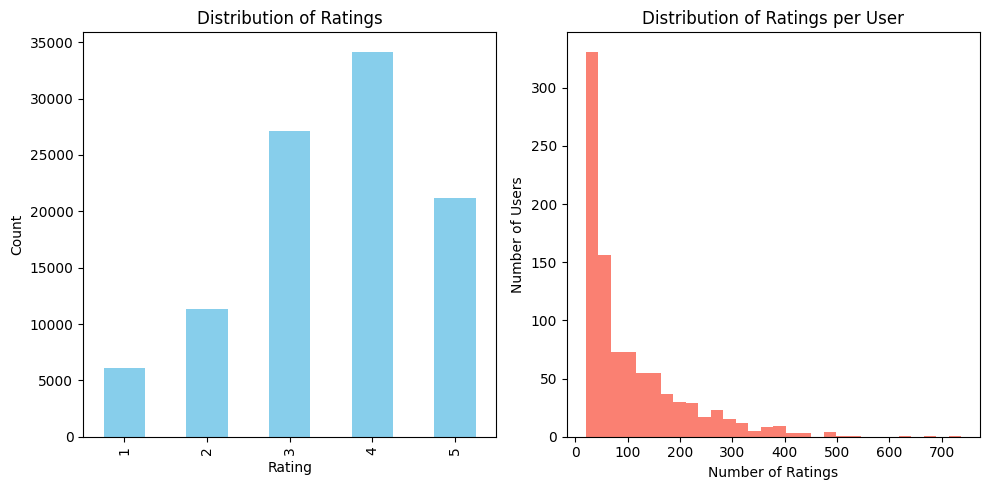

In [33]:
# Visualize the distribution of ratings
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df.groupby('user_id')['rating'].count().plot(kind='hist', bins=30, color='salmon')
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.savefig('rating_distribution.png')
print("Plot saved as 'rating_distribution.png'")

In [34]:
# Explore genres (the core "features" of our movies)
genre_columns = movies.columns[5:] # Get all genre columns
movie_genre_counts = movies[genre_columns].sum().sort_values(ascending=False)

In [35]:
movie_genre_counts.head()

Drama       725
Comedy      505
Action      251
Thriller    251
Romance     247
dtype: int64

Plot saved as 'genre_distribution.png'


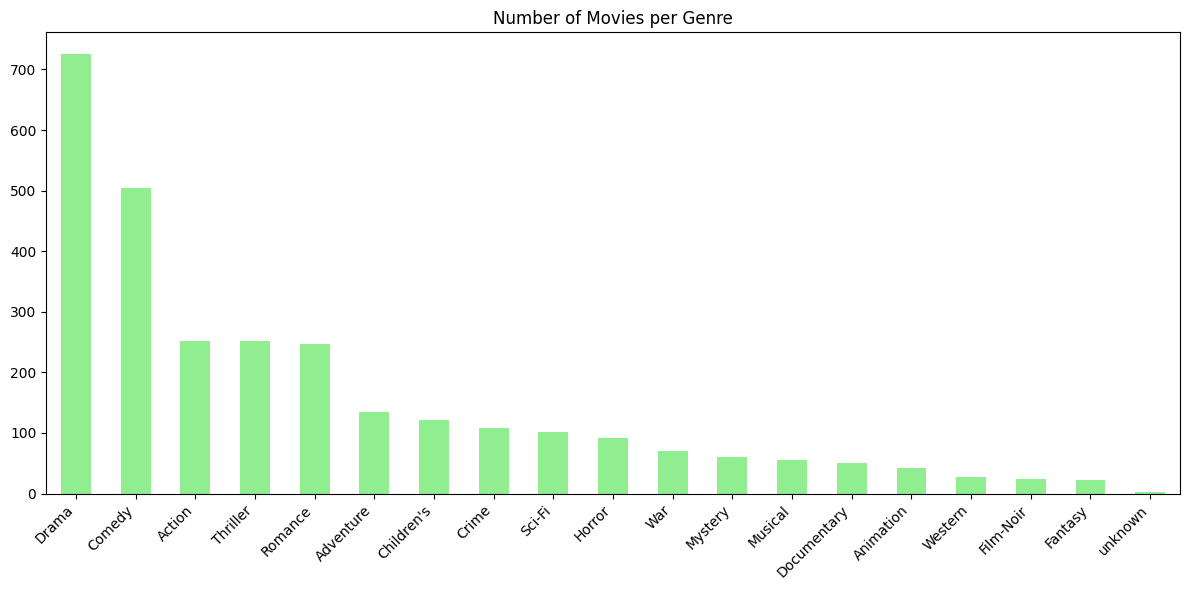

In [36]:
plt.figure(figsize=(12, 6))
movie_genre_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('genre_distribution.png')
print("Plot saved as 'genre_distribution.png'")

In [37]:
print("\n=== TOP 10 MOST RATED MOVIES ===")
top_movies = df['title'].value_counts().head(10)
print(top_movies)


=== TOP 10 MOST RATED MOVIES ===
title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: count, dtype: int64


# Preparing data for bandit

In [38]:
# Merge to get movie titles
df = ratings.merge(movies, on='movie_id')

In [39]:
# Define a binary reward: 1 if rating >= 4, else 0
df['reward'] = (df['rating'] >= 4).astype(int)

In [40]:
# ----------------------------
# 2. DEFINE OUR ARMS (ACTION SPACE)
# ----------------------------
# Let's choose the top 50 most frequently rated movies to start with.
# This creates a manageable action space for our first bandit.
top_movies = df['movie_id'].value_counts().head(50).index.tolist()
# Filter the dataset to only include interactions with these top movies
df_top = df[df['movie_id'].isin(top_movies)].copy()

# Create a mapping from movie_id to a simpler arm index (0 to 49)
arm_index_map = {movie_id: idx for idx, movie_id in enumerate(top_movies)}
df_top['arm'] = df_top['movie_id'].map(arm_index_map)

n_arms = len(top_movies)
print(f"\nWorking with a subset of {n_arms} arms (movies).")
print(f"Number of interactions in this subset: {len(df_top)}")


Working with a subset of 50 arms (movies).
Number of interactions in this subset: 17841


In [41]:
from bandits import ThompsonSamplingBandit, EpsilonGreedyBandit, UCBandit

In [42]:
# ----------------------------
# 3. GENERALIZED SIMULATION FUNCTION
# ----------------------------
def simulate_bandit(bandit, df_sim, n_arms, max_iterations=None):
    """
    Simulate a bandit algorithm on historical data.
    
    Args:
        bandit: Bandit instance (ThompsonSamplingBandit, EpsilonGreedyBandit, or UCBandit)
        df_sim: DataFrame with historical interactions (must have 'arm' and 'reward' columns)
        n_arms: Number of arms
        max_iterations: Optional limit on simulation length
        
    Returns:
        dict: Simulation results including cumulative rewards and final bandit state
    """
    print(f"\nSimulating {bandit.__class__.__name__}...")
    
    # Sort by timestamp to simulate chronological order
    df_sorted = df_sim.sort_values('unix_timestamp')
    
    if max_iterations:
        df_sorted = df_sorted.head(max_iterations)
    
    bandit_cumulative_rewards = []
    bandit_cumulative_reward = 0
    total_interactions = len(df_sorted)
    
    for i, row in df_sorted.iterrows():
        true_arm, true_reward = row['arm'], row['reward']
        
        # 1. Bandit chooses an arm
        chosen_arm = bandit.select_arm()
        
        # 2. We observe the reward for the arm that was *actually* taken in the historical data.
        # In a true online setting, we would get a reward for the chosen_arm.
        # For this simulation, we use the "true_reward" only if the bandit happened to choose
        # the same movie the user actually watched.
        if chosen_arm == true_arm:
            reward_for_update = true_reward
            bandit_cumulative_reward += true_reward
        else:
            # If the bandit chose a different movie, we don't get to observe the reward for its choice.
            reward_for_update = None
        
        # 3. Update the bandit with the outcome, but only if we have a reward for the chosen action
        if reward_for_update is not None:
            bandit.update(chosen_arm, reward_for_update)
        
        # 4. Track cumulative reward for the bandit
        bandit_cumulative_rewards.append(bandit_cumulative_reward / (i+1))
    
    return {
        'bandit': bandit,
        'cumulative_rewards': bandit_cumulative_rewards,
        'final_cumulative_reward': bandit_cumulative_reward / total_interactions,
        'total_interactions': total_interactions
    }

In [49]:
# ----------------------------
# 4. COMPARE ALL BANDIT ALGORITHMS
# ----------------------------
print("\nComparing all bandit algorithms...")

# Initialize bandits with different parameters
bandits = {
    'Thompson Sampling': ThompsonSamplingBandit(n_arms),
    'Epsilon-Greedy (ε=0.1)': EpsilonGreedyBandit(n_arms, epsilon=0.1),
    'Epsilon-Greedy (ε=0.01)': EpsilonGreedyBandit(n_arms, epsilon=0.01),
    'UCB (c=2.0)': UCBandit(n_arms, c=2.0),
    'UCB (c=1.0)': UCBandit(n_arms, c=1.0)
}

# Run simulations for each bandit
results = {}
for name, bandit in bandits.items():
    results[name] = simulate_bandit(bandit, df_top, n_arms)

# Calculate random policy baseline
random_cumulative_rewards = []
cumulative_reward = 0
df_sorted = df_top.sort_values('unix_timestamp')

for i, row in df_sorted.iterrows():
    cumulative_reward += row['reward']
    print(cumulative_reward)
    random_cumulative_rewards.append(cumulative_reward / (i+1))


Comparing all bandit algorithms...

Simulating ThompsonSamplingBandit...

Simulating EpsilonGreedyBandit...

Simulating EpsilonGreedyBandit...

Simulating UCBandit...

Simulating UCBandit...
1
2
2
3
3
4
5
6
7
8
9
10
11
12
12
12
13
14
14
14
15
16
17
18
19
20
21
22
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
38
39
40
41
42
43
44
45
46
47
48
48
49
50
50
50
51
52
53
54
55
56
56
56
57
58
58
59
59
59
60
61
62
62
63
64
65
66
67
68
68
69
70
71
72
73
74
75
76
77
78
78
79
79
80
80
81
82
83
84
85
86
86
87
88
89
90
91
92
93
94
95
95
96
97
98
99
100
101
101
102
103
104
105
105
106
107
108
109
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
123
124
125
126
127
128
128
128
129
130
131
132
132
133
134
134
134
135
135
136
136
137
137
137
138
138
138
139
139
140
141
142
142
142
143
144
145
146
147
148
149
150
150
150
150
150
151
152
153
154
154
155
156
157
158
158
159
160
161
162
163
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
182
183
183
183
184
1

In [50]:
random_cumulative_rewards

[1.1909582450039302e-05,
 2.4196670538133953e-05,
 7.575757575757576e-05,
 0.01875,
 0.0007444168734491315,
 0.000922722029988466,
 0.0013854253255749516,
 8.817694172973768e-05,
 9.01481004507405e-05,
 8.200502280764696e-05,
 0.00016902678135446793,
 0.0001292457219666029,
 0.0001667829093004215,
 0.00025276993722879893,
 0.00016704018708500954,
 0.0001561666297939902,
 0.0001384245160465958,
 0.0002452783909737552,
 0.000178117048346056,
 0.00020128824476650564,
 0.0002182865957477771,
 0.00026911561879772595,
 0.0006048100185000712,
 0.00032094715070251766,
 0.0011055510299080647,
 0.0009543350670420384,
 0.08015267175572519,
 0.00031449687647420413,
 0.0008112393524834986,
 0.00037622887802005466,
 0.08080808080808081,
 0.00046621785427894744,
 0.001763309596473381,
 0.0002760312835454685,
 0.0006460991762235503,
 0.0005995947566472315,
 0.0006595290962252952,
 0.0006386616947197099,
 0.0008074079681073853,
 0.0003991484832357637,
 0.0006030186403703243,
 0.0006014055707338866,
 0.


Plotting results...


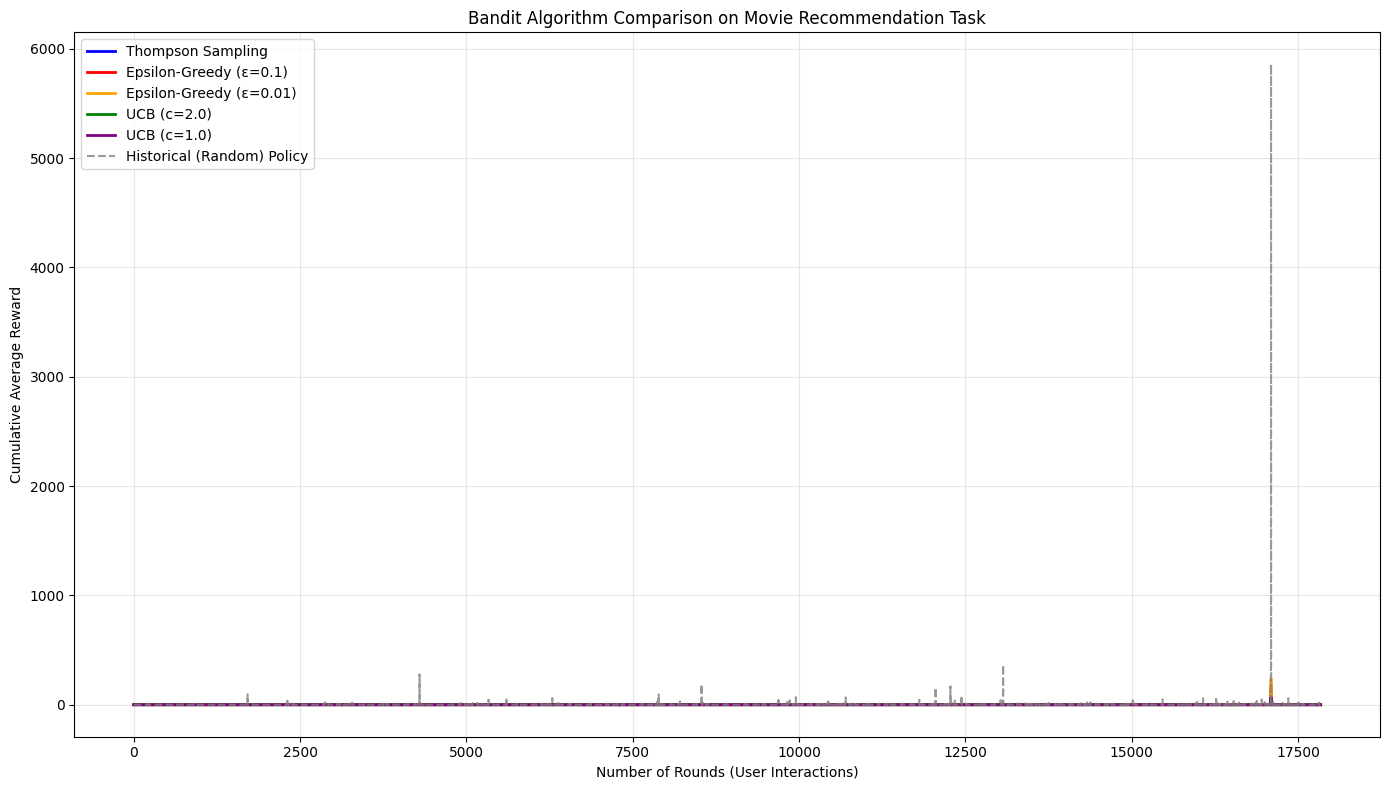


=== COMPARISON RESULTS ===
Thompson Sampling         | Final Reward: 0.0151 | Improvement: -94.27%
Epsilon-Greedy (ε=0.1)    | Final Reward: 0.0194 | Improvement: -92.60%
Epsilon-Greedy (ε=0.01)   | Final Reward: 0.0277 | Improvement: -89.47%
UCB (c=2.0)               | Final Reward: 0.0079 | Improvement: -96.99%
UCB (c=1.0)               | Final Reward: 0.0084 | Improvement: -96.82%

🏆 Best performing algorithm: Epsilon-Greedy (ε=0.01)
.4f

=== TOP 5 RECOMMENDED MOVIES (Epsilon-Greedy (ε=0.01)) ===
50
50
50
50
50

Simulation complete!


In [51]:

# ----------------------------
# 5. PLOT AND ANALYZE RESULTS
# ----------------------------
print("\nPlotting results...")
plt.figure(figsize=(14, 8))

# Plot all bandit algorithms
colors = ['blue', 'red', 'orange', 'green', 'purple', 'brown']
for i, (name, result) in enumerate(results.items()):
    plt.plot(result['cumulative_rewards'], 
             label=name, 
             linewidth=2, 
             color=colors[i % len(colors)])

# Plot random baseline
plt.plot(random_cumulative_rewards, 
         label='Historical (Random) Policy', 
         linestyle='--', 
         color='gray', 
         alpha=0.8)

plt.xlabel('Number of Rounds (User Interactions)')
plt.ylabel('Cumulative Average Reward')
plt.title('Bandit Algorithm Comparison on Movie Recommendation Task')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('bandit_comparison_performance.png', dpi=150)
plt.show()

# %%
# Analyze final performance for each algorithm
print("\n=== COMPARISON RESULTS ===")
final_random_reward = random_cumulative_rewards[-1]

for name, result in results.items():
    final_reward = result['final_cumulative_reward']
    improvement = ((final_reward - final_random_reward) / final_random_reward) * 100
    print(f"{name: <25} | Final Reward: {final_reward:.4f} | Improvement: {improvement:+.2f}%")

# %%
# Find the best performing algorithm
best_algorithm = max(results.items(), key=lambda x: x[1]['final_cumulative_reward'])
print(f"\n🏆 Best performing algorithm: {best_algorithm[0]}")
print(".4f")

# %%
# Show top recommendations from the best algorithm
best_bandit = best_algorithm[1]['bandit']
print(f"\n=== TOP 5 RECOMMENDED MOVIES ({best_algorithm[0]}) ===")

if isinstance(best_bandit, ThompsonSamplingBandit):
    # For Thompson Sampling, use Beta distribution parameters
    arm_probs = best_bandit.alpha / (best_bandit.alpha + best_bandit.beta)
    top_5_arms = np.argsort(arm_probs)[-5:][::-1]
elif isinstance(best_bandit, (EpsilonGreedyBandit, UCBandit)):
    # For other bandits, use the learned values
    arm_values = best_bandit.values / np.where(best_bandit.counts > 0, best_bandit.counts, 1)
    top_5_arms = np.argsort(arm_values)[-5:][::-1]
else:
    print("Unknown bandit type")
    top_5_arms = []

# Map arm indices back to movie titles
for arm_idx in top_5_arms:
    original_movie_id = top_movies[arm_idx]
    movie_title = movies.loc[movies['movie_id'] == original_movie_id, 'title'].iloc[0]
    
    if isinstance(best_bandit, ThompsonSamplingBandit):
        est_prob = arm_probs[arm_idx]
        print("50")
    else:
        est_value = arm_values[arm_idx]
        print("50")

print("\nSimulation complete!")